In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
!pip install feature_engine

In [2]:
#get datasets
data = pd.read_csv('credit_ds_v3.csv')

#get all columns for 7 first rows
pd.set_option('display.max_columns', None)
data.head(7)

,X,number_of_cards,outstanding,credit_limit,bill,total_cash_usage,total_retail_usage,remaining_bill,branch_code,payment_ratio,overlimit_percentage,payment_ratio_3month,payment_ratio_6month,delinquency_score,default_flag,years_since_card_issuing,total_usage,remaining_bill_per_number_of_cards,remaining_bill_per_limit,total_usage_per_limit,total_3mo_usage_per_limit,total_6mo_usage_per_limit,utilization_3month,utilization_6month
0,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,A,0.00,0.0,0.00,0.00,NaN,0,0.750000,1012.0,0.00,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
1,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,A,100.00,0.0,100.00,100.91,NaN,0,10.750000,0.0,0.00,0.000000,0.000000,0.040518,0.047703,0.249389,NaN
2,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,A,95.99,0.0,97.49,99.84,NaN,0,1.666667,2666558.0,2975932.50,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571
3,6,2,6227439,80000000.0,2081248.0,0.0,3690250.0,4613435.0,A,0.00,0.0,28.46,42.03,NaN,0,10.250000,3690250.0,2306717.50,0.057668,0.046128,0.017184,0.117513,0.038964,0.181863
4,7,2,3906290,4000000.0,2043682.0,0.0,230400.0,3314046.0,A,18.47,0.0,24.95,17.89,NaN,0,4.666667,230400.0,1657023.00,0.828511,0.057600,0.018750,0.166667,1.014776,0.977231
5,8,4,9534837,20000000.0,3692028.0,0.0,9327612.0,7881069.0,A,58.55,0.0,105.24,166.67,NaN,0,0.750000,9327612.0,1970267.25,0.394053,0.466381,0.239289,0.241599,0.261753,0.224026
6,10,4,1818606,7000000.0,1765911.0,0.0,0.0,1627786.0,A,100.00,0.0,58.40,62.68,NaN,0,8.500000,0.0,406946.50,0.232541,0.000000,0.075000,0.094801,0.315145,NaN


In [3]:
data.shape

(15645, 24)

In [4]:
data.isnull().sum()

X                                        0
number_of_cards                          0
outstanding                              0
credit_limit                             0
bill                                     0
total_cash_usage                        45
total_retail_usage                       0
remaining_bill                           0
branch_code                            195
payment_ratio                            0
overlimit_percentage                    26
payment_ratio_3month                     0
payment_ratio_6month                     0
delinquency_score                       88
default_flag                             0
years_since_card_issuing                 0
total_usage                              0
remaining_bill_per_number_of_cards       0
remaining_bill_per_limit                 0
total_usage_per_limit                    0
total_3mo_usage_per_limit                0
total_6mo_usage_per_limit                0
utilization_3month                       0
utilization

In [5]:
data.describe()

,X,number_of_cards,outstanding,credit_limit,bill,total_cash_usage,total_retail_usage,remaining_bill,payment_ratio,overlimit_percentage,payment_ratio_3month,payment_ratio_6month,delinquency_score,default_flag,years_since_card_issuing,total_usage,remaining_bill_per_number_of_cards,remaining_bill_per_limit,total_usage_per_limit,total_3mo_usage_per_limit,total_6mo_usage_per_limit,utilization_3month,utilization_6month
count,15645.000000,15645.000000,1.564500e+04,1.564500e+04,1.564500e+04,1.560000e+04,1.564500e+04,1.564500e+04,15645.000000,15619.000000,15645.000000,15645.000000,15557.000000,15645.000000,15645.000000,1.564500e+04,1.564500e+04,15645.000000,15645.000000,15645.000000,15645.000000,15645.000000,12803.000000
mean,7823.000000,2.506040,1.160622e+07,2.082010e+07,8.076442e+06,7.457618e+04,2.024806e+06,8.146804e+06,7.036890,3.330655,50.496321,81.544782,0.033747,0.090508,6.628854,2.099281e+06,2.970392e+06,0.467782,0.108977,0.167157,0.202454,0.570447,0.526346
std,4516.466816,1.012536,2.407941e+07,2.955419e+07,1.759983e+07,6.177873e+05,7.909345e+06,1.924667e+07,792.912029,9.215148,1320.816758,1460.736051,0.359216,0.286918,4.668085,8.073250e+06,6.270020e+06,0.473080,0.199740,0.192212,0.274421,0.411997,0.432190
min,1.000000,1.000000,0.000000e+00,3.000000e+06,2.004300e+04,0.000000e+00,-1.566720e+07,0.000000e+00,-49860.000000,0.000000,-57792.340000,-77056.000000,0.000000,0.000000,0.750000,-1.566720e+07,0.000000e+00,0.000000,-0.632000,-0.126000,-0.569000,0.000288,0.000000
25%,3912.000000,2.000000,1.992796e+06,5.000000e+06,8.139470e+05,0.000000e+00,0.000000e+00,0.000000e+00,-17.300000,0.000000,20.200000,21.500000,0.000000,0.000000,2.920000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.034767,0.032600,0.189000,0.155000
50%,7823.000000,2.000000,4.718779e+06,9.000000e+06,3.141366e+06,0.000000e+00,2.000000e+05,2.747165e+06,0.000000,0.000000,50.000000,65.500000,0.000000,0.000000,5.666667,2.438000e+05,1.202134e+06,0.333000,0.021700,0.108000,0.117000,0.574000,0.480000
75%,11734.000000,3.000000,1.066531e+07,2.200000e+07,7.404069e+06,0.000000e+00,1.396204e+06,7.142464e+06,44.600000,1.010000,91.200000,100.000000,0.000000,0.000000,9.330000,1.507478e+06,3.087616e+06,0.929000,0.127143,0.239000,0.285000,0.916000,0.847594
max,15645.000000,16.000000,7.980586e+08,1.000000e+09,6.280000e+08,2.884057e+07,2.850000e+08,4.440000e+08,68983.000000,190.000000,75575.000000,54899.000000,5.000000,1.000000,34.416667,3.140000e+08,1.480000e+08,7.240000,4.600000,3.490000,8.110000,8.125671,9.730000


### Data Explore

In [6]:
def nullity(data):
    print('Count of data {}'.format(data.shape[0]))
    df_info = pd.DataFrame(columns=
                          ['Columns', 'Null', 'NullPct', 'Unique'])
    df_info['Columns'] = data.columns
    df_info['Null'] = df_info['Columns'].apply(lambda x: sum(data[x].isna()))
    df_info['NullPct'] = df_info['Null'].apply(lambda x: round(x/len(data)*100, 2))
    df_info['Unique'] = df_info['Columns'].apply(lambda x: data[x].nunique())
    return df_info
    
nullity(data)

Count of data 15645


,Columns,Null,NullPct,Unique
0,X,0,0.00,15645
1,number_of_cards,0,0.00,15
2,outstanding,0,0.00,10359
3,credit_limit,0,0.00,150
4,bill,0,0.00,10018
5,total_cash_usage,45,0.29,94
6,total_retail_usage,0,0.00,5714
7,remaining_bill,0,0.00,6947
8,branch_code,195,1.25,11
9,payment_ratio,0,0.00,2273


In [7]:
data.dtypes

X                                       int64
number_of_cards                         int64
outstanding                             int64
credit_limit                          float64
bill                                  float64
total_cash_usage                      float64
total_retail_usage                    float64
remaining_bill                        float64
branch_code                            object
payment_ratio                         float64
overlimit_percentage                  float64
payment_ratio_3month                  float64
payment_ratio_6month                  float64
delinquency_score                     float64
default_flag                            int64
years_since_card_issuing              float64
total_usage                           float64
remaining_bill_per_number_of_cards    float64
remaining_bill_per_limit              float64
total_usage_per_limit                 float64
total_3mo_usage_per_limit             float64
total_6mo_usage_per_limit         

<function matplotlib.pyplot.show(close=None, block=None)>

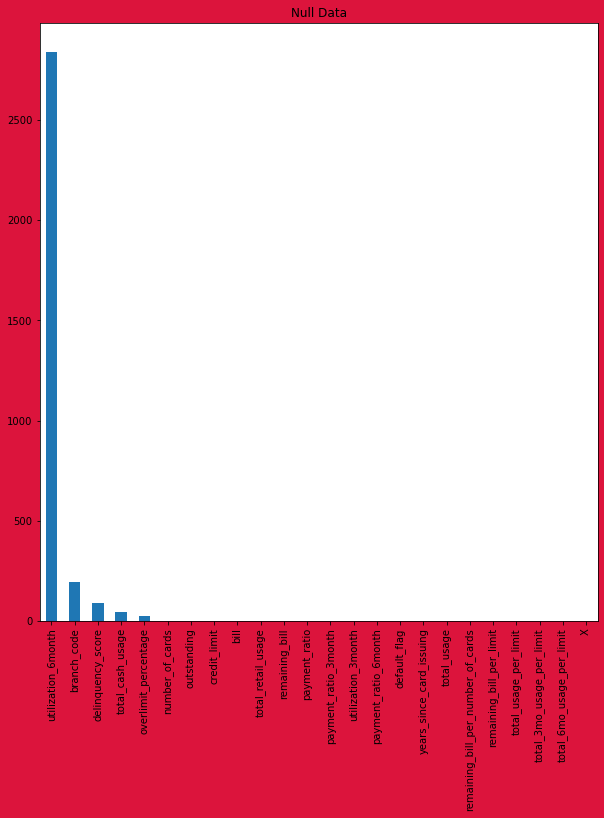

In [8]:
null_data = data.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(10,11), facecolor='crimson')
null_data.plot(kind='bar')
plt.title('Null Data')
plt.show

In [9]:
data['total_cash_usage'].median()

0.0

Missing Value

In [10]:
#input missing value in total_cash_usage with median
data['total_cash_usage'].fillna(data['total_cash_usage'].median(), inplace=True)
data['total_cash_usage'].isna().sum()

0

In [11]:
data['branch_code'].value_counts()

A    8705
F    1697
B    1351
I     991
E     649
G     566
J     410
H     367
C     334
D     205
K     175
Name: branch_code, dtype: int64

In [12]:
#input missing value in branch_code with 'O'
data['branch_code'].fillna('O', inplace=True)
data['branch_code'].isna().sum()

0

In [13]:
data['overlimit_percentage'].median()

0.0

In [14]:
#input missing value in overlimit_percentage' with median
data['overlimit_percentage'].fillna(data['overlimit_percentage'].median(), inplace=True)
data['overlimit_percentage'].isna().sum()

0

In [15]:
data['delinquency_score'].value_counts()

0.0    15394
5.0       42
4.0       34
3.0       34
1.0       29
2.0       24
Name: delinquency_score, dtype: int64

In [16]:
#input missing value in 'delinquency_score' with mode
data['delinquency_score'].fillna(0, inplace=True)
data['delinquency_score'].isna().sum()

0

In [17]:
data['utilization_6month'].median()

0.48

In [18]:
#input missing value in 'utilization_6month' with median
data['utilization_6month'].fillna(data['utilization_6month'].median(), inplace=True)
data['utilization_6month'].isna().sum()

0

In [19]:
data.isna().sum()

X                                     0
number_of_cards                       0
outstanding                           0
credit_limit                          0
bill                                  0
total_cash_usage                      0
total_retail_usage                    0
remaining_bill                        0
branch_code                           0
payment_ratio                         0
overlimit_percentage                  0
payment_ratio_3month                  0
payment_ratio_6month                  0
delinquency_score                     0
default_flag                          0
years_since_card_issuing              0
total_usage                           0
remaining_bill_per_number_of_cards    0
remaining_bill_per_limit              0
total_usage_per_limit                 0
total_3mo_usage_per_limit             0
total_6mo_usage_per_limit             0
utilization_3month                    0
utilization_6month                    0
dtype: int64

Analysis 

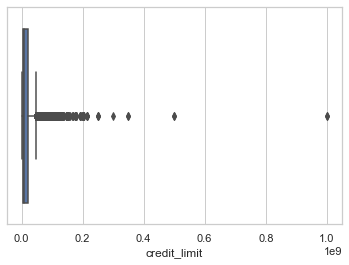

In [20]:
#Finding outliers data in credit_limit

sns.set_theme(style='whitegrid')
ax = sns.boxplot(x = data['credit_limit'])

In [21]:
#Exclude outlier data
data = data[data['credit_limit'] < np.nanpercentile(data['credit_limit'], 99)]

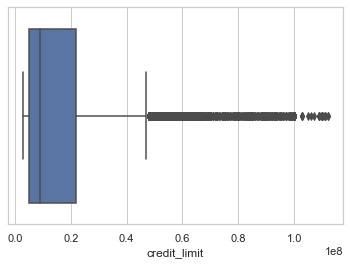

In [22]:
#Recheck boxplot
sns.set_theme(style='whitegrid')
ax = sns.boxplot(x = data['credit_limit'])

<AxesSubplot:xlabel='total_usage'>

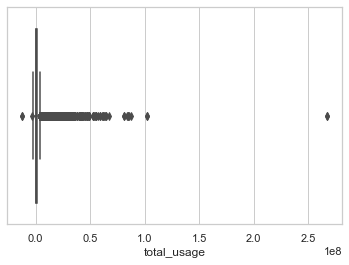

In [23]:
#Finding outliers
sns.set_theme(style='whitegrid')
sns.boxplot(x = data['total_usage'])

In [24]:
#Exclude outliers
data = data[(data['total_usage'] >= 0) & (data['total_usage'] < np.nanpercentile(data['total_usage'], 99))]

<AxesSubplot:xlabel='total_usage'>

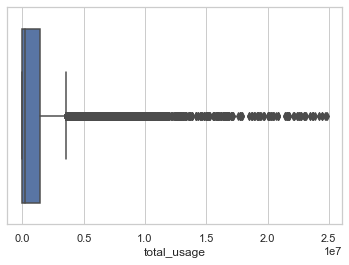

In [25]:
#Recheck boxplot
sns.set_theme(style='whitegrid')
sns.boxplot(x = data['total_usage'])

<AxesSubplot:xlabel='branch_code', ylabel='credit_limit'>

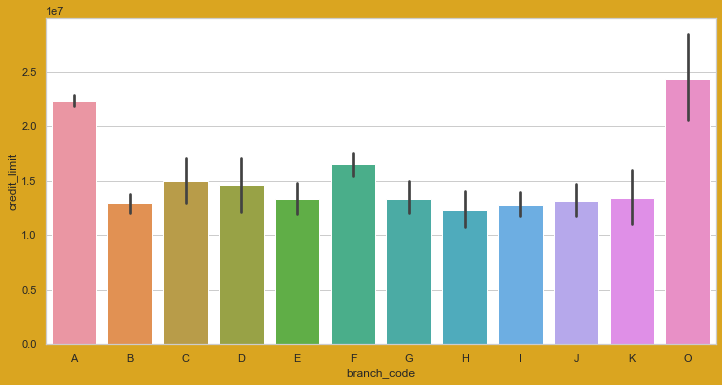

In [26]:
#compare credit limit for each branch_code
plt.figure(figsize=(12,6), facecolor='goldenrod')
sns.barplot(x='branch_code', y='credit_limit', data=data)

<AxesSubplot:xlabel='credit_limit', ylabel='number_of_cards'>

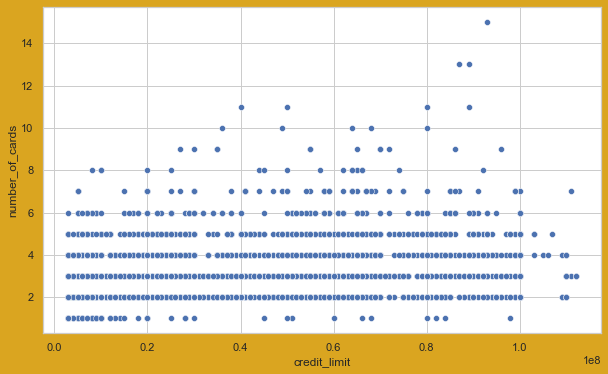

In [27]:
#see correlation between credit_limit and number_of_cards
plt.figure(figsize=(10,6), facecolor='goldenrod')
sns.scatterplot(x='credit_limit', y='number_of_cards', data=data)

<AxesSubplot:xlabel='number_of_cards', ylabel='bill'>

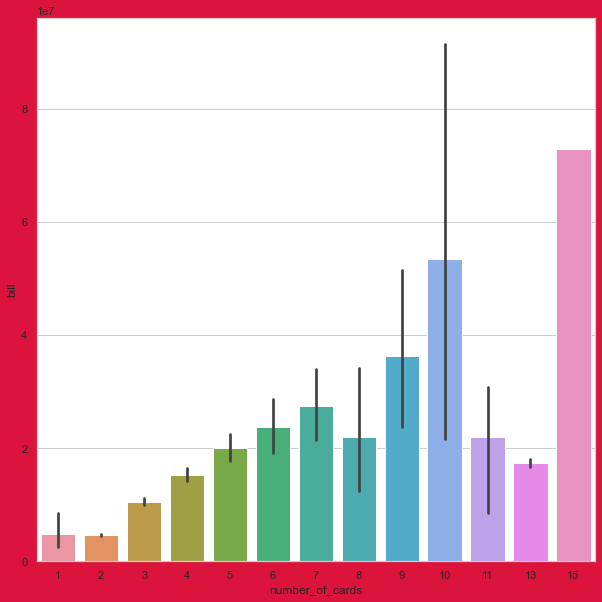

In [28]:
#see correlation between number_of_cards and bill
plt.figure(figsize=(10,10), facecolor='crimson')
sns.barplot(x='number_of_cards', y='bill', data=data)

<AxesSubplot:xlabel='number_of_cards', ylabel='overlimit_percentage'>

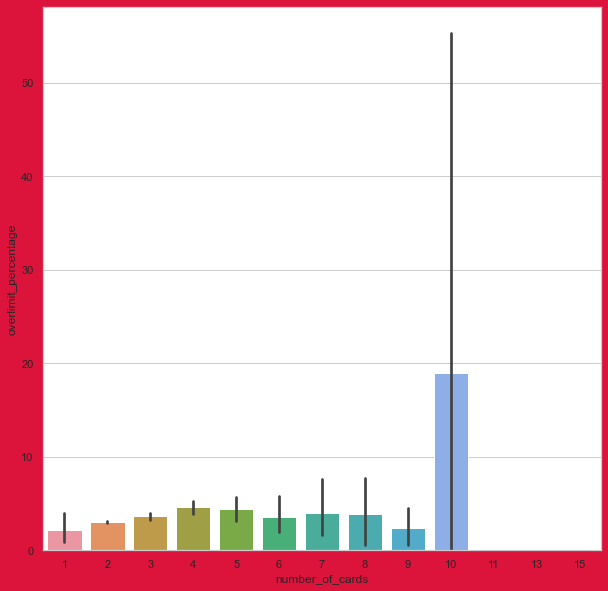

In [29]:
#see correlation between number_of_cards and bill
plt.figure(figsize=(10,10), facecolor='crimson')
sns.barplot(x='number_of_cards', y='overlimit_percentage', data=data)

In [30]:
data_t0 = data[data['default_flag'] == 0]
data_t1 = data[data['default_flag'] == 1]

In [31]:
#compare min_max credit limit between each flag
print('Max credit limit for flag 0: {}'.format(data_t0['credit_limit'].max()))
print('Max credit limit for flag 1: {}\n\n'.format(data_t1['credit_limit'].max()))

print('Min credit limit for flag 0: {}'.format(data_t0['credit_limit'].min()))
print('Min credit limit for flag 1: {}\n\n'.format(data_t1['credit_limit'].min()))

Max credit limit for flag 0: 112000000.0
Max credit limit for flag 1: 110000000.0


Min credit limit for flag 0: 3000000.0
Min credit limit for flag 1: 3000000.0




In [32]:
#count per delinquency_score
del0 = pd.DataFrame(data_t0['delinquency_score'].value_counts().reset_index().rename(columns={'index':'delScore'}))
del0

,delScore,delinquency_score
0,0.0,13880
1,1.0,22
2,2.0,3
3,3.0,2


In [33]:
del1 = pd.DataFrame(data_t1['delinquency_score'].value_counts().reset_index().rename(columns={'index':'delScore'}))
del1

,delScore,delinquency_score
0,0.0,1250
1,5.0,41
2,4.0,34
3,3.0,31
4,2.0,21
5,1.0,7


Checking Imbalance

Non default flag: 90.95%
Default flag: 9.05%


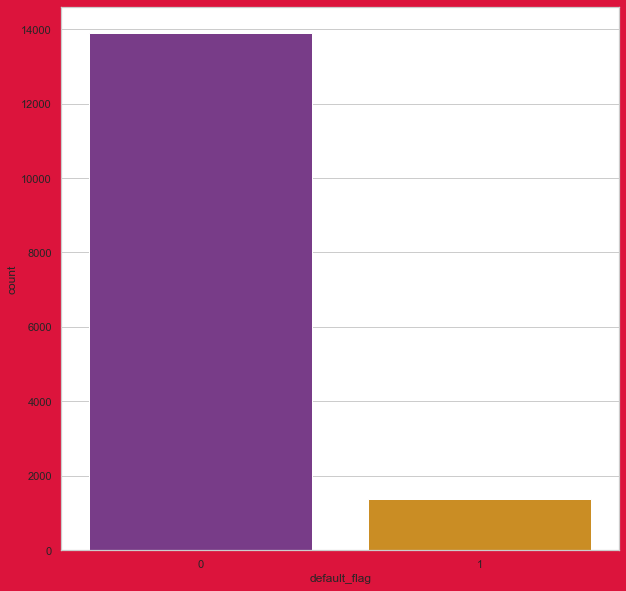

In [34]:
plt.figure(figsize=(10,10), facecolor='crimson')
sns.countplot(x='default_flag', data=data, palette = 'CMRmap')

print('Non default flag: {}%'.format(round(data['default_flag'].value_counts()[0] / len(data) * 100.0,2)))
print('Default flag: {}%'.format(round( data['default_flag'].value_counts()[1] / len(data) * 100, 2 )))

## Modelling 

###### Data Imbalance 

#####  Mean Encoder

In [35]:
from sklearn.model_selection import train_test_split

x_train_im, x_test_im, y_train_im, y_test_im = train_test_split(
    data.drop('default_flag', axis=1), #predictors
    data['default_flag'], #target
    test_size=0.2,
    random_state=0)

In [36]:
#Since Branch_Code value is object, we have to transform into numerical value.
from feature_engine.encoding import MeanEncoder

mean_enc_im = MeanEncoder(variables=['branch_code'])
mean_enc_im.fit(x_train_im, y_train_im)

MeanEncoder(variables=['branch_code'])

In [37]:
mean_enc_im.variables

['branch_code']

In [38]:
mean_enc_im.encoder_dict_

{'branch_code': {'A': 0.08787165145716809,
  'B': 0.10506208213944604,
  'C': 0.08461538461538462,
  'D': 0.06060606060606061,
  'E': 0.16110019646365423,
  'F': 0.08320839580209895,
  'G': 0.04918032786885246,
  'H': 0.09491525423728814,
  'I': 0.10755441741357234,
  'J': 0.0875,
  'K': 0.07462686567164178,
  'O': 0.024096385542168676}}

In [39]:
#Then transform into the data train and data test
x_train_enc_im = mean_enc_im.transform(x_train_im)
x_test_enc_im = mean_enc_im.transform(x_test_im)

####  Logistic Regression

              precision    recall  f1-score   support

 Non-default       0.91      0.99      0.95      2782
     Default       0.39      0.03      0.06       277

    accuracy                           0.91      3059
   macro avg       0.65      0.51      0.51      3059
weighted avg       0.86      0.91      0.87      3059



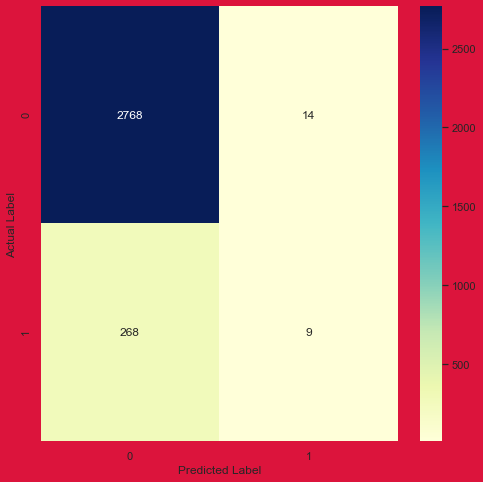

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, precision_score, recall_score, accuracy_score
logreg = LogisticRegression()
logreg.fit(x_train_enc_im, y_train_im)
y_pred_im = logreg.predict(x_test_enc_im)
cnf_matrix = confusion_matrix(y_test_im, y_pred_im)

plt.figure(figsize=(8,8), facecolor='crimson')
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

labels = ['Non-default', 'Default']
print(classification_report(y_test_im, y_pred_im, target_names=labels))

##### ROC AUC 

In [41]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_im, y_pred_im)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5137293119512493

Text(0, 0.5, 'True Positive Rate')

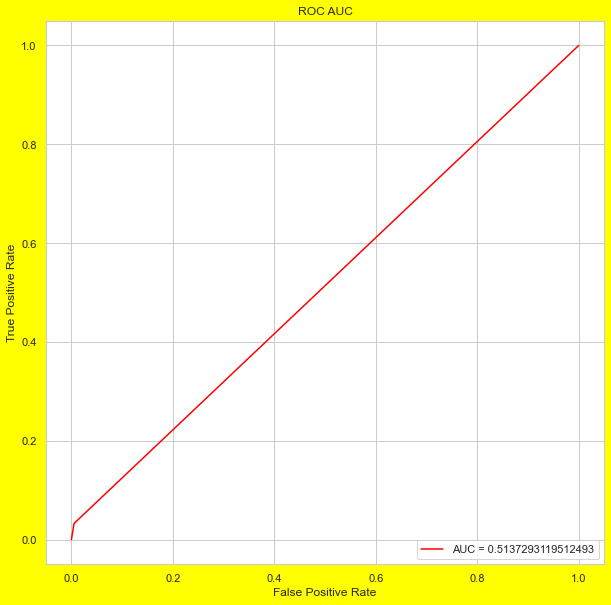

In [42]:
plt.figure(figsize = (10,10), facecolor = 'yellow')
plt.title('ROC AUC')
plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = {}'.format(roc_auc))
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#### Random Forest 

              precision    recall  f1-score   support

 Non-default       0.92      0.99      0.96      2782
     Default       0.74      0.18      0.29       277

    accuracy                           0.92      3059
   macro avg       0.83      0.59      0.62      3059
weighted avg       0.91      0.92      0.90      3059



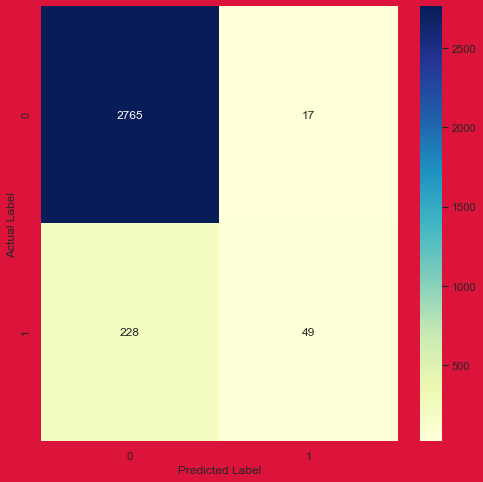

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train_enc_im, y_train_im)
y_pred_im = rf.predict(x_test_enc_im)
cnf_matrix = confusion_matrix(y_test_im, y_pred_im)

plt.figure(figsize=(8,8), facecolor='crimson')
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

labels = ['Non-default', 'Default']
print(classification_report(y_test_im, y_pred_im, target_names=labels))

#####  ROC AUC

In [44]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_im, y_pred_im)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5853922975705088

Text(0, 0.5, 'True Positive Rate')

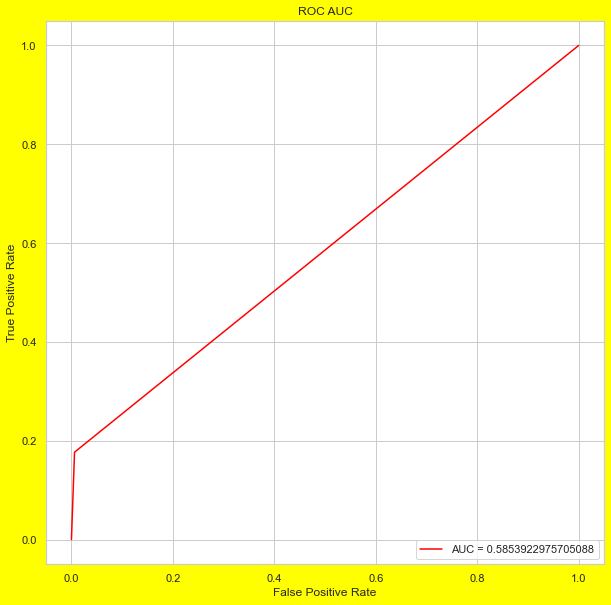

In [45]:
plt.figure(figsize = (10,10), facecolor = 'yellow')
plt.title('ROC AUC')
plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = {}'.format(roc_auc))
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

###### Data Balance 

Since the data is imbalance, we can adding more copies to minority data using oversampling method

In [46]:
flag_count_0, flag_count_1 = data['default_flag'].value_counts()

# Separate class
data_t0 = data[data['default_flag'] == 0]
data_t1 = data[data['default_flag'] == 1]# print the shape of the class
print('flag 0:', data_t0.shape)
print('flag 1:', data_t1.shape)

flag 0: (13907, 24)
flag 1: (1384, 24)


total class of 1 and 0:
 1    13907
0    13907
Name: default_flag, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

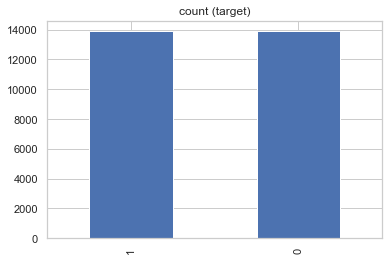

In [47]:
flag_1_over = data_t1.sample(flag_count_0, replace=True)

data_over = pd.concat([flag_1_over, data_t0], axis=0)

print("total class of 1 and 0:\n",data_over['default_flag'].value_counts())# plot the count after under-sampeling
data_over['default_flag'].value_counts().plot(kind='bar', title='count (target)')

#####  Mean Encoder

In [48]:
x_train_bal, x_test_bal, y_train_bal, y_test_bal = train_test_split(
    data_over.drop('default_flag', axis=1), #predictors
    data_over['default_flag'], #target
    test_size=0.2,
    random_state=0)

mean_enc_bal = MeanEncoder(variables=['branch_code'])
mean_enc_bal.fit(x_train_bal, y_train_bal)

#Then transform into the data train and data test
x_train_enc_bal = mean_enc_bal.transform(x_train_bal)
x_test_enc_bal = mean_enc_bal.transform(x_test_bal)

#### Logistic Regression 

              precision    recall  f1-score   support

 Non-default       0.66      0.58      0.62      2804
     Default       0.62      0.70      0.66      2759

    accuracy                           0.64      5563
   macro avg       0.64      0.64      0.64      5563
weighted avg       0.64      0.64      0.64      5563



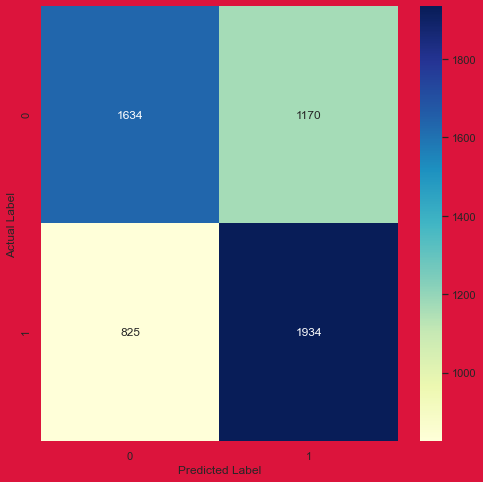

In [49]:
logreg = LogisticRegression()
logreg.fit(x_train_enc_bal, y_train_bal)
y_pred_bal = logreg.predict(x_test_enc_bal)
cnf_matrix = confusion_matrix(y_test_bal, y_pred_bal)

plt.figure(figsize=(8,8), facecolor='crimson')
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

labels = ['Non-default', 'Default']
print(classification_report(y_test_bal, y_pred_bal, target_names=labels))

#####  ROC AUC

In [50]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_bal, y_pred_bal)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6418587799027847

Text(0, 0.5, 'True Positive Rate')

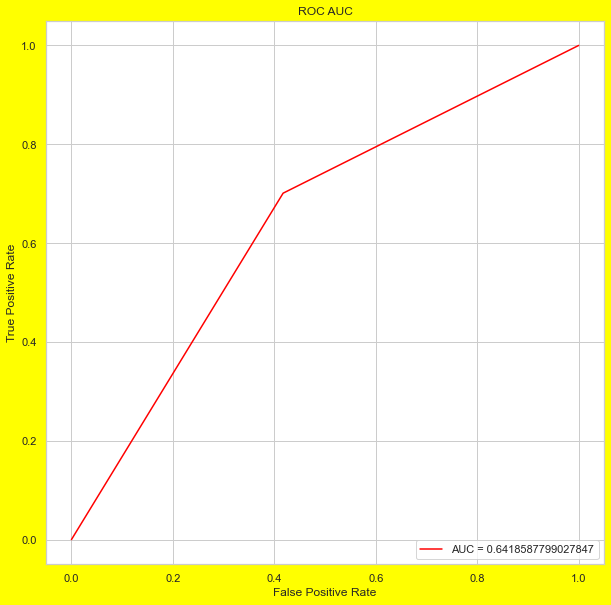

In [51]:
plt.figure(figsize = (10,10), facecolor = 'yellow')
plt.title('ROC AUC')
plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = {}'.format(roc_auc))
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#####  Random Forest

              precision    recall  f1-score   support

 Non-default       1.00      0.98      0.99      2804
     Default       0.98      1.00      0.99      2759

    accuracy                           0.99      5563
   macro avg       0.99      0.99      0.99      5563
weighted avg       0.99      0.99      0.99      5563



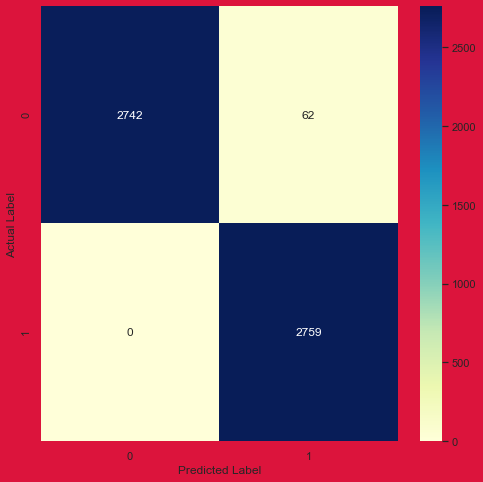

In [52]:
# from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train_enc_bal, y_train_bal)
y_pred_bal = rf.predict(x_test_enc_bal)
cnf_matrix = confusion_matrix(y_test_bal, y_pred_bal)

plt.figure(figsize=(8,8), facecolor='crimson')
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

labels = ['Non-default', 'Default']
print(classification_report(y_test_bal, y_pred_bal, target_names=labels))

#####  ROC AUC

In [53]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_bal, y_pred_bal)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.988944365192582

Text(0, 0.5, 'True Positive Rate')

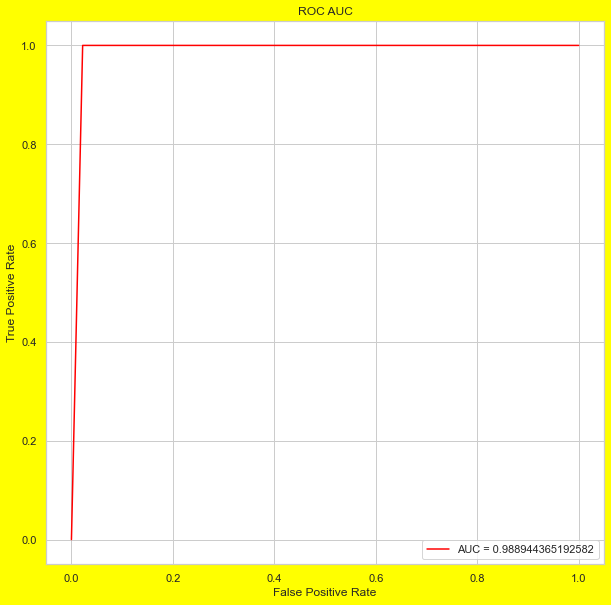

In [54]:
plt.figure(figsize = (10,10), facecolor = 'yellow')
plt.title('ROC AUC')
plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = {}'.format(roc_auc))
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')